Importing necessary libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import re

In [69]:
!pip install nltk
import nltk

In [31]:
df=pd.read_csv('dataset1.csv')

In [32]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [33]:
df['Sentiment'].unique()

array([0, 1], dtype=int64)

In [34]:
df.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [36]:
###ItemID and Sentiment are int datatype and SentimentText is an object datatype

# Data Preprocessing

In [37]:
def patterns(input_pattern,pattern):
    r=re.findall(pattern,input_pattern)
    for word in r:
        input_pattern=re.sub(word,"",input_pattern)
    return input_pattern

In [38]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [39]:
#removing spe
df['SentimentText']=df['SentimentText'].str.replace("[^a-zA-Z#]"," ")

In [40]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already O
3,4,0,Omgaga Im sooo im gunna CRy I ...
4,5,0,i think mi bf is cheating on me ...


In [41]:
df["SentimentText"]=df['SentimentText'].apply(lambda x:" ".join([w for w in x.split() if len(w)>2]))

In [42]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,sad for APL friend
1,2,0,missed the New Moon trailer
2,3,1,omg its already
3,4,0,Omgaga sooo gunna CRy been this dentist since ...
4,5,0,think cheating


In [43]:
##splitting the words as tokens
words=df['SentimentText'].apply(lambda x:x.split())

In [44]:
words

0                                  [sad, for, APL, friend]
1                        [missed, the, New, Moon, trailer]
2                                      [omg, its, already]
3        [Omgaga, sooo, gunna, CRy, been, this, dentist...
4                                        [think, cheating]
                               ...                        
99984    [Cupcake, seems, like, repeating, problem, hop...
99985    [cupcake, arrrr, both, replied, each, other, o...
99986                                   [CuPcAkE, thought]
99987    [Cupcake, Dollie, Yes, Yes, glad, you, had, mo...
99988                     [cupcake, kayla, haha, yes, you]
Name: SentimentText, Length: 99989, dtype: object

In [45]:
##stemming the words 
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
words=words.apply(lambda sentence:[stemmer.stem(word) for word in sentence])

In [46]:
words.head()

0                              [sad, for, apl, friend]
1                      [miss, the, new, moon, trailer]
2                                   [omg, it, alreadi]
3    [omgaga, sooo, gunna, cri, been, thi, dentist,...
4                                       [think, cheat]
Name: SentimentText, dtype: object

In [47]:
##Combining words into single sentence.
for i in range (len(words)):
    words[i]= " ".join(words[i])
     
 

In [48]:
df['SentimentText']=words
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,sad for apl friend
1,2,0,miss the new moon trailer
2,3,1,omg it alreadi
3,4,0,omgaga sooo gunna cri been thi dentist sinc wa...
4,5,0,think cheat


# Visulization of data

In [49]:
##Displaying frequent words
all_words=" ".join([sentence for sentence in df['SentimentText']])

In [50]:
!pip install wordcloud

In [51]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

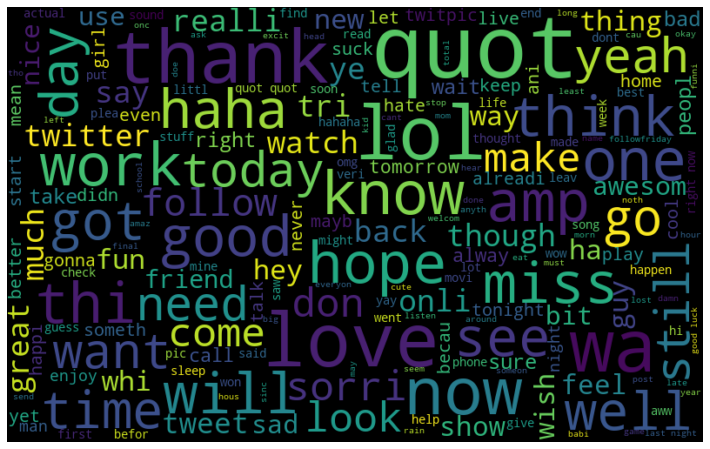

In [52]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
all_words=" ".join([sentence for sentence in df['SentimentText'][df['Sentiment']==0]])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)


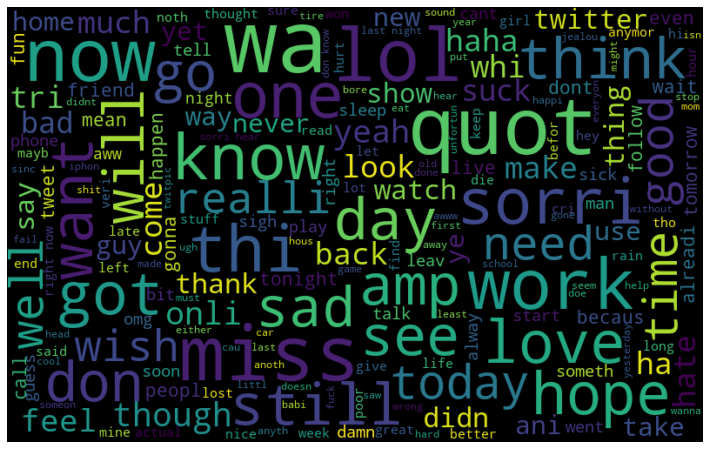

In [54]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


In [55]:
all_words=" ".join([sentence for sentence in df['SentimentText'][df['Sentiment']==1 ]])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)


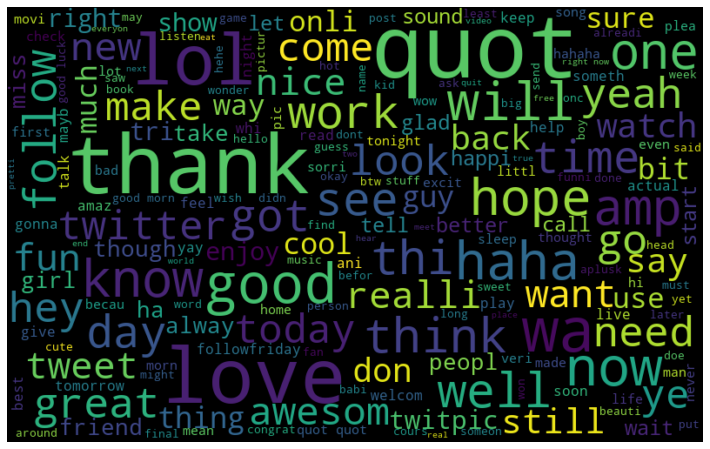

In [56]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


In [59]:
 ##Extracting the hashtag
def hashtag(tweets):
    hashtags=[]
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

In [152]:
ht_sad=hashtag(df['SentimentText'][df['Sentiment']==0])
ht_happy=hashtag(df['SentimentText'][df['Sentiment']==1])

In [153]:
ht_sad=sum(ht_sad,[])   
ht_happy=sum(ht_happy,[])

In [154]:
ht_sad[:5] 

['asylm', 'squarespac', 'susan', 'twenti', 'iphon']

In [155]:
freq=nltk.FreqDist(ht_sad)
d=pd.DataFrame({"Hashtag": list(freq.keys()),
                'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,asylm,11
1,squarespac,95
2,susan,2
3,twenti,2
4,iphon,34


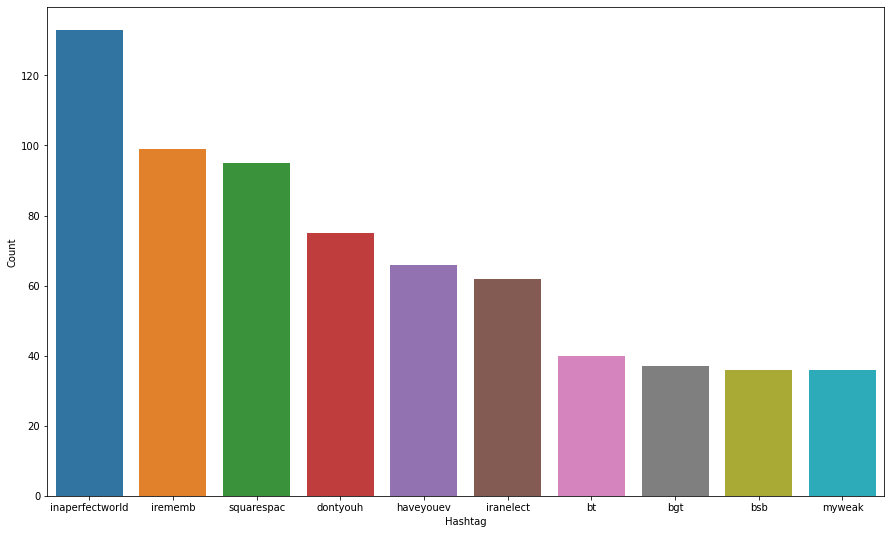

In [156]:
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=( 15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [157]:
freq=nltk.FreqDist(ht_happy)
d=pd.DataFrame({"Hashtag": list(freq.keys()),
                'Count':list(freq.values())})
d.head() 

,Hashtag,Count
0,poemsund,1
1,video,4
2,robotpickuplin,10
3,skydiv,1
4,andyhurleyday,20


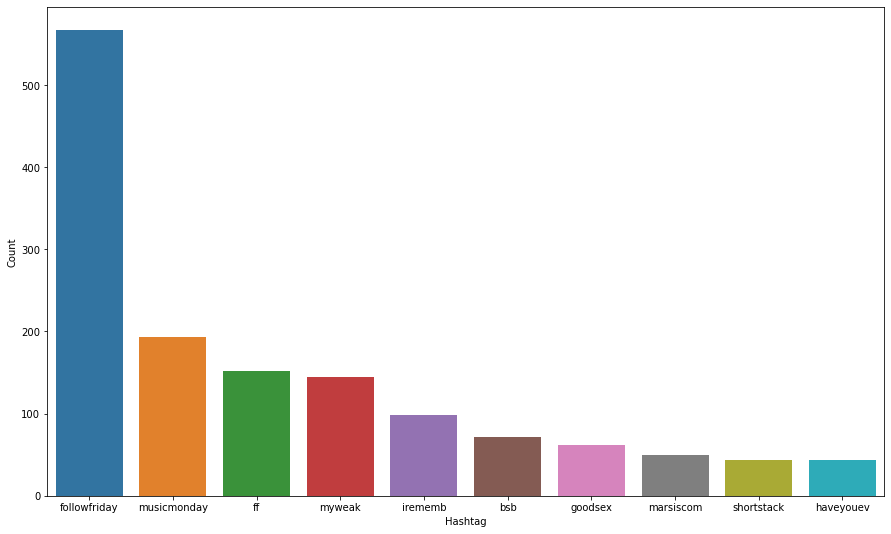

In [158]:
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=( 15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [159]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['SentimentText'])

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train,X_test,y_train,y_test=train_test_split(bow,df['Sentiment'],test_size=0.30,random_state=42)

# Model Training

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [163]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [164]:
pred=model.predict(X_test)
f1_score(y_test,pred) 

0.7788469537727739

In [165]:
accuracy_score(y_test,pred) 

0.7341400806747341

In [166]:
#pred_prob=model.predict_proba(X_test)
#pred=pred_prob[:,1]>=0.4
#prde=pred.astype(np.int)

In [167]:
f1_score(y_test,pred) 

0.7788469537727739

In [168]:
accuracy_score(y_test,pred) 

0.7341400806747341